In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df= pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [30]:
df.shape

(100, 4)

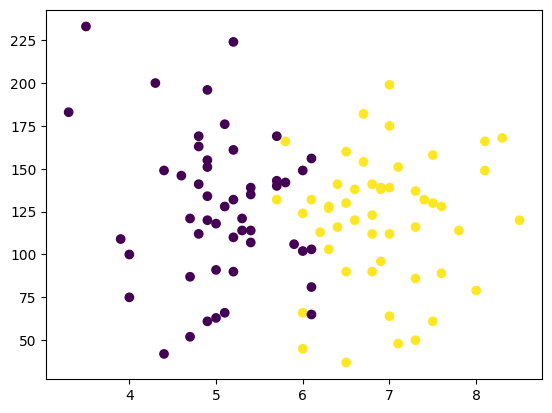

In [31]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

In [32]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]


In [33]:
x.shape,y.shape

((100, 2), (100,))

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
x_train=scaler.fit_transform(x_train)

In [38]:
x_train

array([[ 0.14721733,  1.64027754],
       [ 1.29031656, -1.44090679],
       [-0.85732443,  0.91529299],
       [-0.30309449,  1.4590314 ],
       [ 0.63216852,  2.27463902],
       [-1.23835751, -0.80654531],
       [-0.37237324, -0.98779145],
       [ 1.56743153, -1.44090679],
       [-1.44619373, -0.80654531],
       [ 0.73608663,  1.1871622 ],
       [-1.37691499,  0.82466992],
       [-0.12989764, -0.71592224],
       [ 1.18639845, -0.17218383],
       [-0.78804569, -0.71592224],
       [ 1.46351342,  0.73404686],
       [-1.58475122,  1.00591606],
       [ 0.52825041,  0.82466992],
       [ 0.49361103,  1.91214675],
       [-0.54557009,  0.73404686],
       [-1.20371814, -0.71592224],
       [-0.0606189 , -0.5346761 ],
       [-0.58020946, -1.07841452],
       [-1.51547247, -0.89716838],
       [ 1.53279216, -1.53152986],
       [-0.82268506,  0.00906231],
       [-1.09980002, -0.71592224],
       [ 1.04784097, -0.5346761 ],
       [-0.8919638 , -0.89716838],
       [ 0.38969292,

In [39]:
x_test=scaler.transform(x_test)

In [40]:
x_test

array([[ 1.11711971,  1.36840833],
       [ 0.07793858,  2.09339288],
       [ 0.66680789,  0.28093151],
       [-0.19917638,  0.00906231],
       [-0.23381575,  1.36840833],
       [-0.40701261, -1.25966065],
       [-0.99588191, -0.98779145],
       [ 1.0132016 , -0.98779145],
       [-1.41155436,  0.00906231],
       [-1.75794807,  0.73404686],
       [-1.13443939, -1.80339906],
       [-0.71876694,  1.4590314 ],
       [ 0.770726  , -0.98779145],
       [-0.61484883,  0.00906231],
       [ 1.3595953 ,  1.1871622 ],
       [-1.61939059, -0.17218383],
       [ 0.87464411, -0.98779145],
       [ 0.90928348,  1.1871622 ],
       [-1.34227562, -0.5346761 ],
       [-0.68412757, -1.89402213]])

In [41]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [42]:
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [43]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

<Axes: >

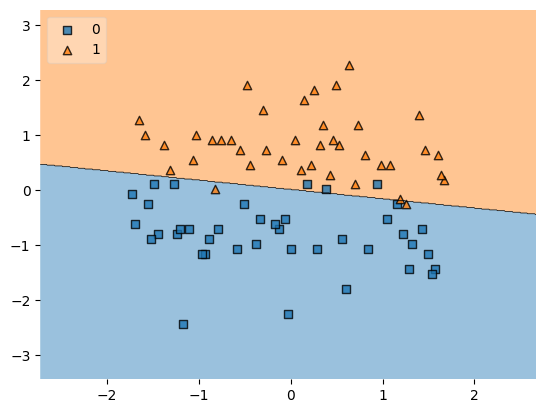

In [46]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=lr,legend=2)

In [48]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))

In [58]:
model=pickle.load(open('model.pkl','rb'))
model.predict([[1,2]])
lr.predict([[100,2]])

array([1])